## Exploratory Data Analysis

In [1]:
#Importing the libraries needed for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
#Loaading the dataset
emissions_data = pd.read_csv("Emissions_Canada.csv")
emissions_data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
#Getting the basic information about the dataset
emissions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [4]:
#Checking for missing values
emissions_data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [5]:
#Converting all columns names to lowercase
emissions_data.columns = emissions_data.columns.str.lower()

# Remove leading/trailing spaces and replace internal spaces with underscores
emissions_data.columns = emissions_data.columns.str.strip().str.replace(' ', '_')

print(emissions_data.columns.tolist())


['make', 'model', 'vehicle_class', 'engine_size(l)', 'cylinders', 'transmission', 'fuel_type', 'fuel_consumption_city_(l/100_km)', 'fuel_consumption_hwy_(l/100_km)', 'fuel_consumption_comb_(l/100_km)', 'fuel_consumption_comb_(mpg)', 'co2_emissions(g/km)']


In [6]:
#Numerical descriptive summary
numerical_emissions_data = emissions_data.describe(include = np.number).T
numerical_emissions_data

,count,mean,std,min,25%,50%,75%,max
engine_size(l),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
fuel_consumption_city_(l/100_km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
fuel_consumption_hwy_(l/100_km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
fuel_consumption_comb_(l/100_km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
fuel_consumption_comb_(mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
co2_emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [15]:
#Categorical descriptive summary
emissions_data.describe(include = object)

,make,model,vehicle_class,transmission,fuel_type
count,7385,7385,7385,7385,7385
unique,42,2053,16,27,5
top,FORD,F-150 FFV 4X4,SUV - SMALL,AS6,X
freq,628,32,1217,1324,3637


### Visualizations of the Data

In [7]:
# The distribution of each of the data

numerical_columns = emissions_data.select_dtypes(include=np.number).columns
print(numerical_columns)


categorical_columns = emissions_data.select_dtypes(include = object).columns
categorical_columns

Index(['engine_size(l)', 'cylinders', 'fuel_consumption_city_(l/100_km)',
       'fuel_consumption_hwy_(l/100_km)', 'fuel_consumption_comb_(l/100_km)',
       'fuel_consumption_comb_(mpg)', 'co2_emissions(g/km)'],
      dtype='object')


Index(['make', 'model', 'vehicle_class', 'transmission', 'fuel_type'], dtype='object')

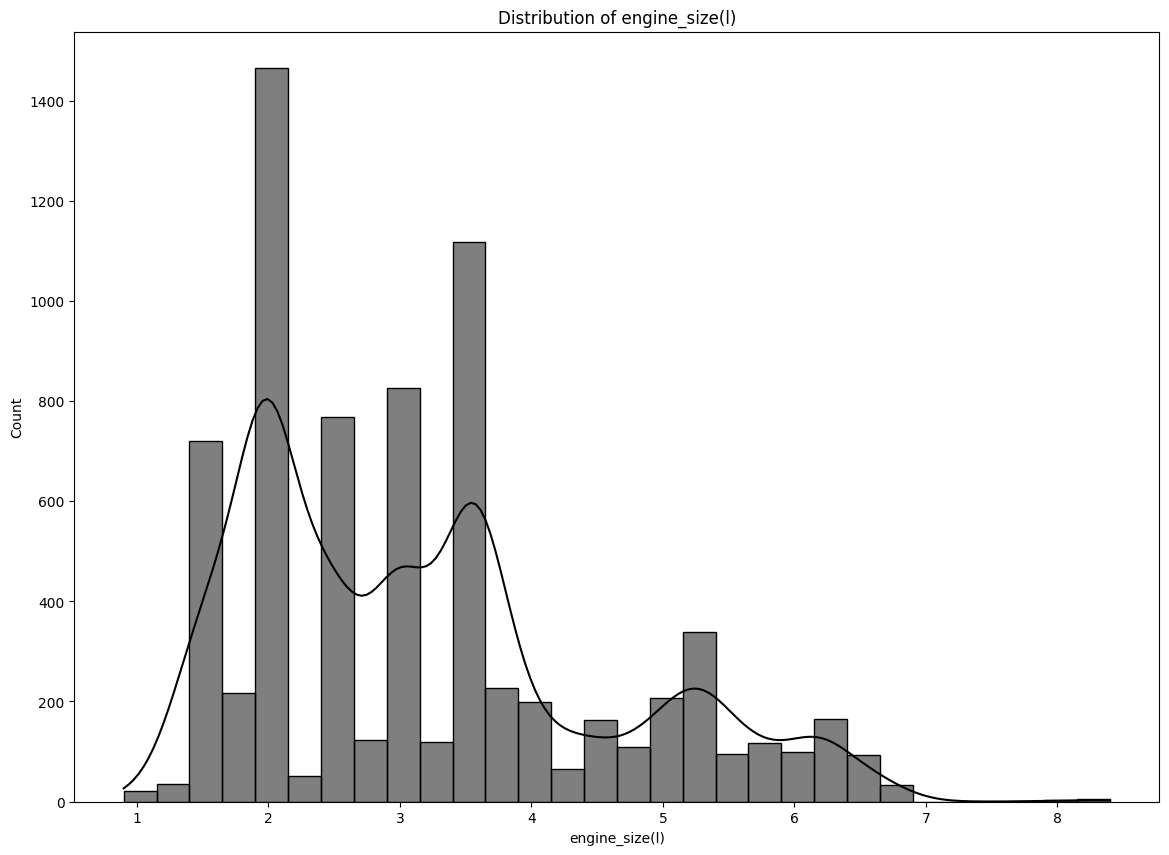

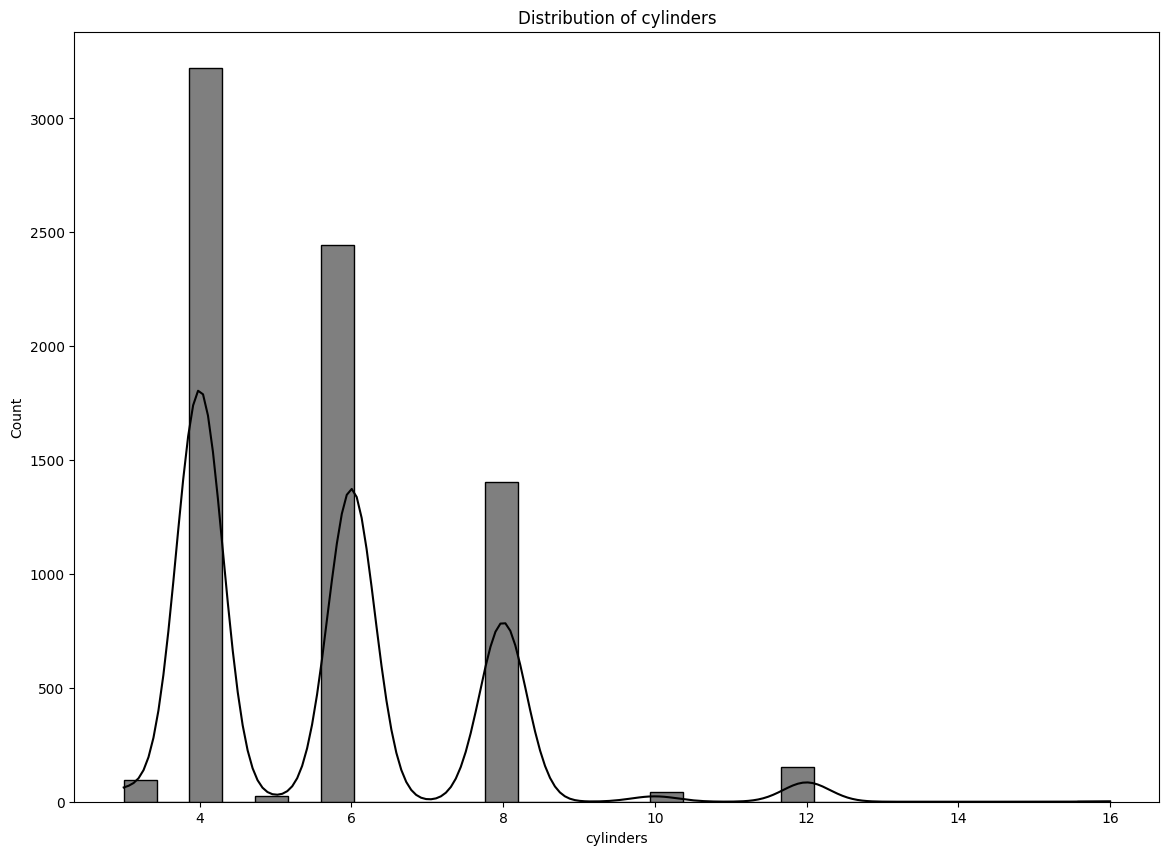

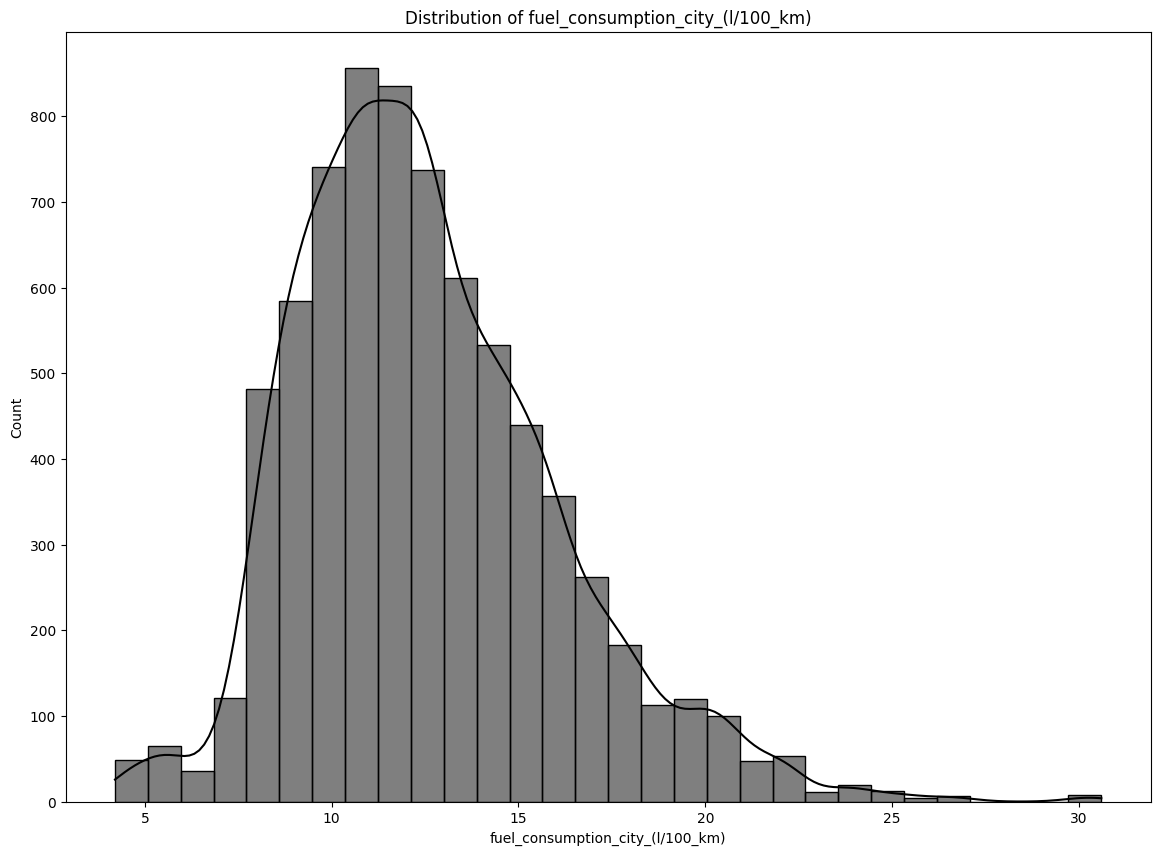

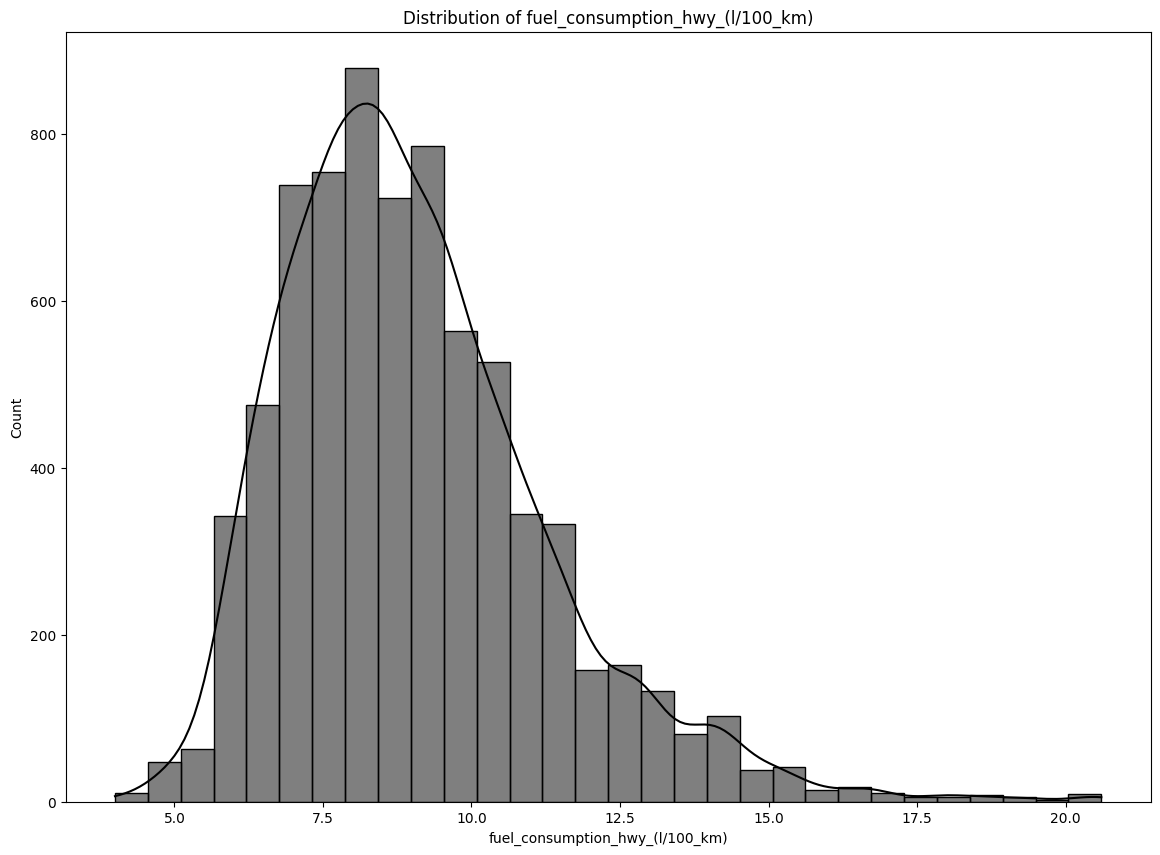

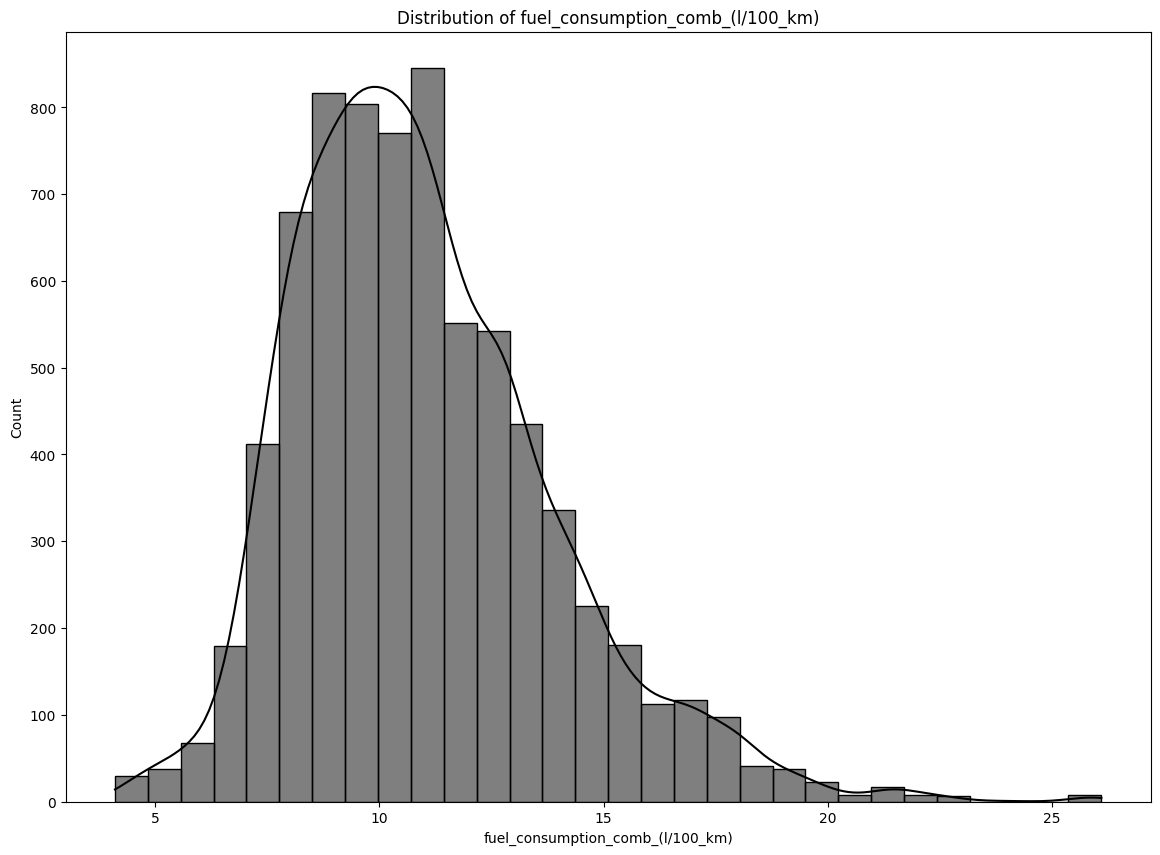

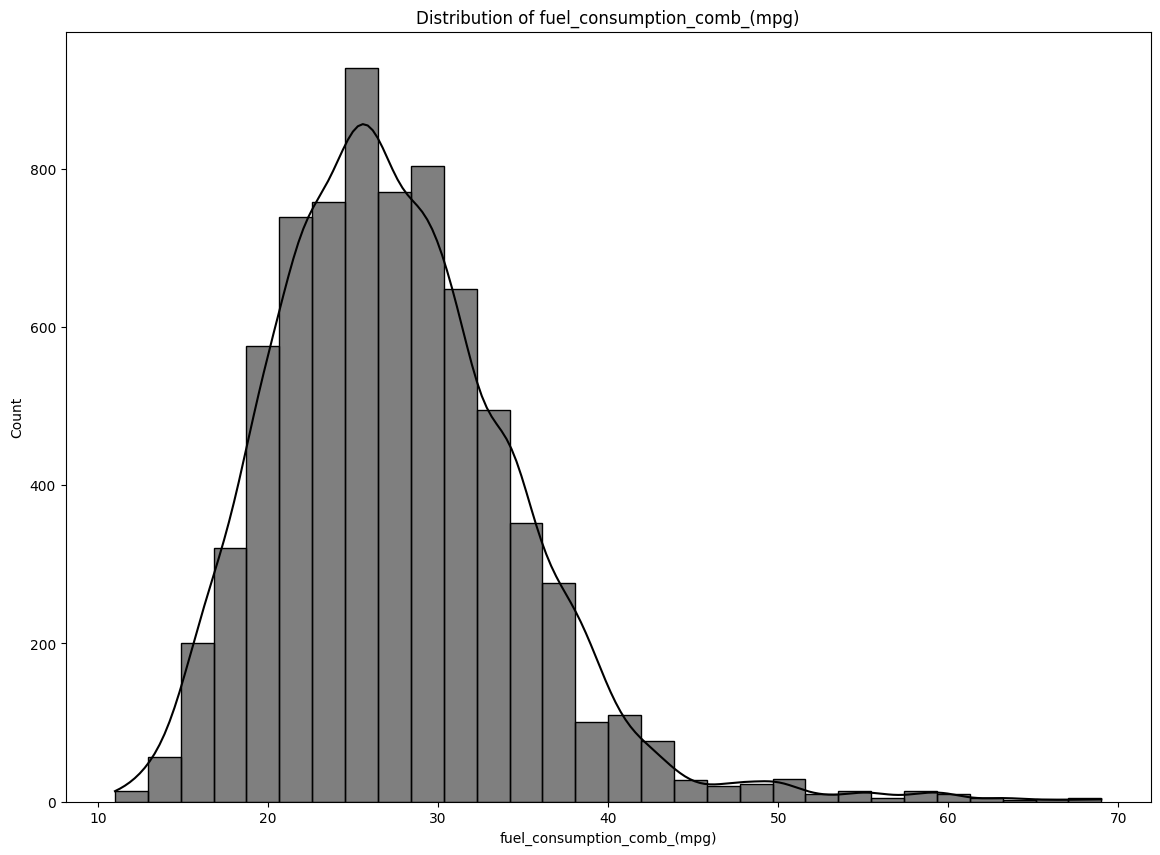

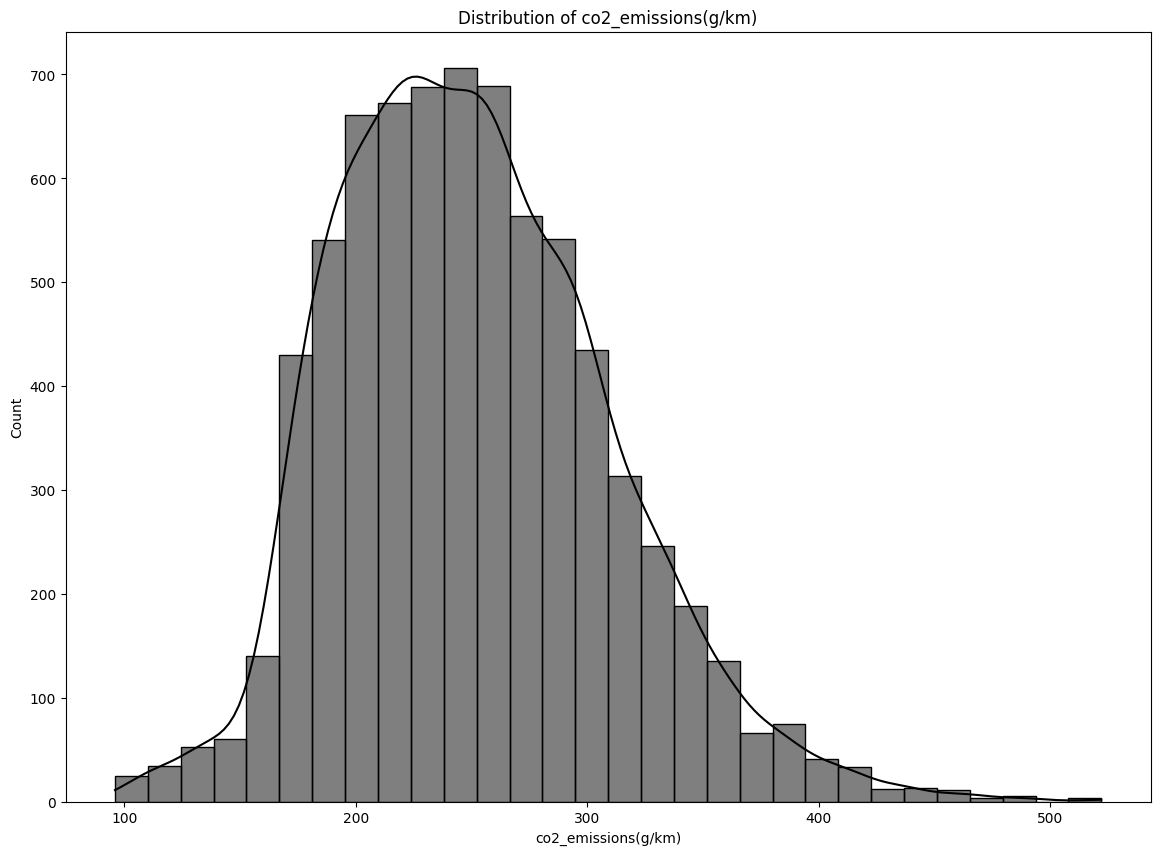

In [66]:
# Univariate Analysis
#Checking the distributions of each of the data
for col in numerical_columns:
    plt.figure(figsize=(14,10))
    sns.histplot(emissions_data[col], bins=30, kde=True, color='black',edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.show()


In [8]:
emissions_data.rename(columns={'co2_emissions(g/km)': 'co2_emissions'}, inplace=True)


In [9]:
#Selecting the feature columns and the target column
target_variable = 'co2_emissions'
numerical_features = ['engine_size(l)', 'cylinders']
categorical_feature = 'fuel_type'


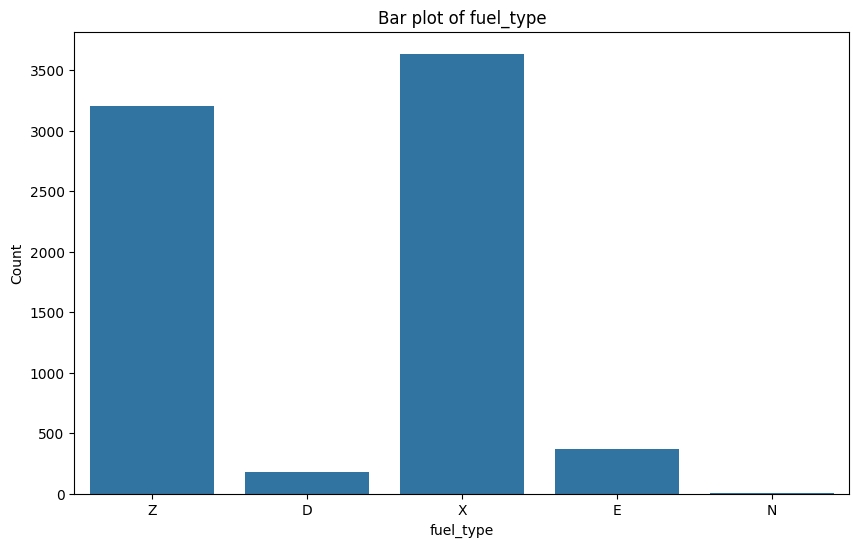

In [86]:
plt.figure(figsize=(10, 6))
sns.countplot(x=categorical_feature, data=emissions_data)
plt.xlabel(categorical_feature)
plt.ylabel('Count')
plt.title(f'Bar plot of {categorical_feature}')
plt.show()


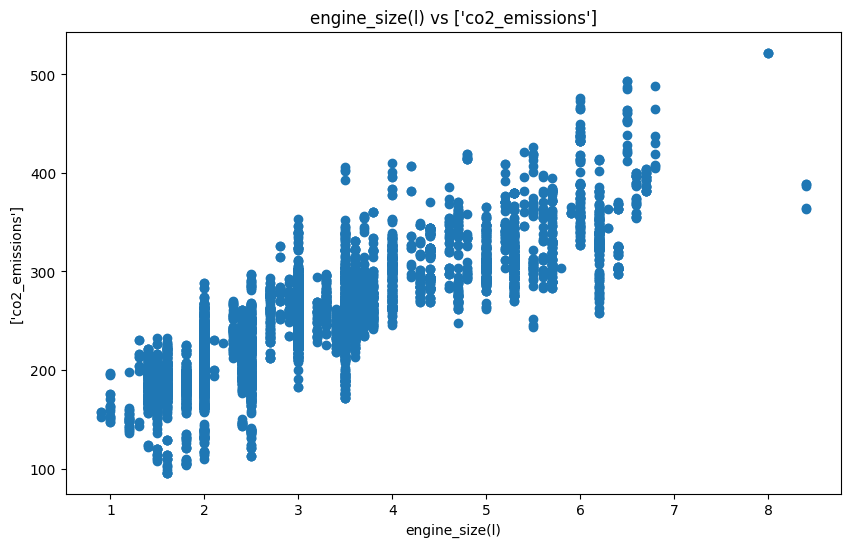

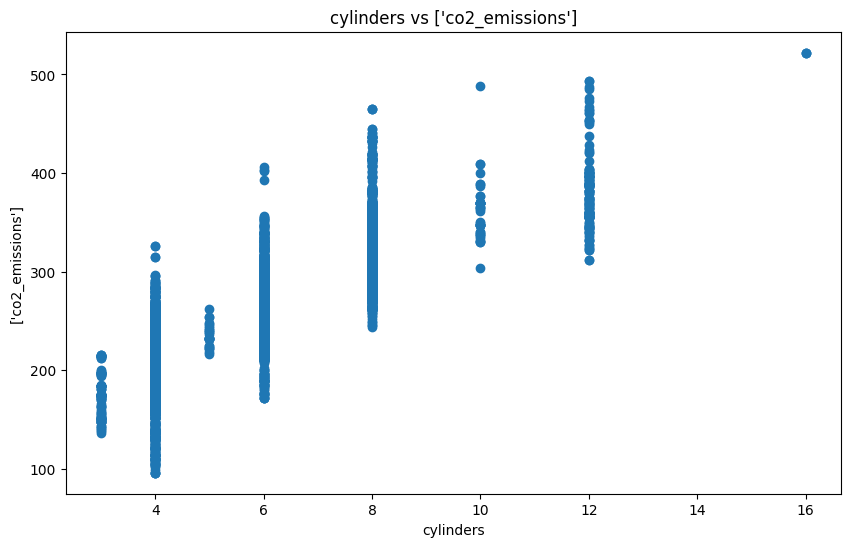

In [70]:
#Visualizing the relatinship between the selected numerical features and the target feature
for col in numerical_features:
    plt.figure(figsize=(10,6))
    plt.scatter(emissions_data[col], emissions_data[target_variable])
    plt.title(f'{col} vs {target_variable}')
    plt.xlabel(col)
    plt.ylabel(target_variable)
    plt.show()

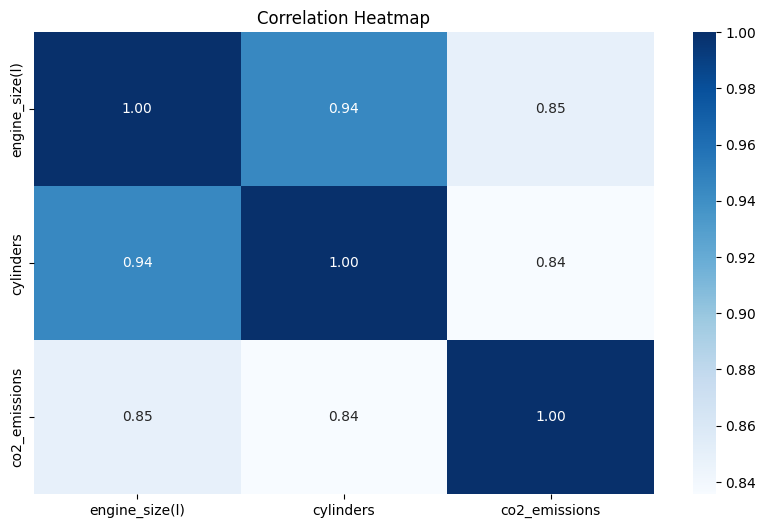

In [25]:
#Using a heatmap to visualize the correlation between the numerical features including the target variable
plt.figure(figsize=(10, 6))
correlation_matrix = emissions_data[numerical_features + target_variable].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [10]:
#Detecting outliers using the IQR method
for col in numerical_features + [target_variable]:
    Q1 = emissions_data[col].quantile(0.25)
    Q3 = emissions_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = emissions_data[(emissions_data[col] < lower_bound) | (emissions_data[col] > upper_bound)]
    print(f"\n{col}: {len(outliers)} outliers detected.")



engine_size(l): 137 outliers detected.

cylinders: 196 outliers detected.

co2_emissions: 80 outliers detected.


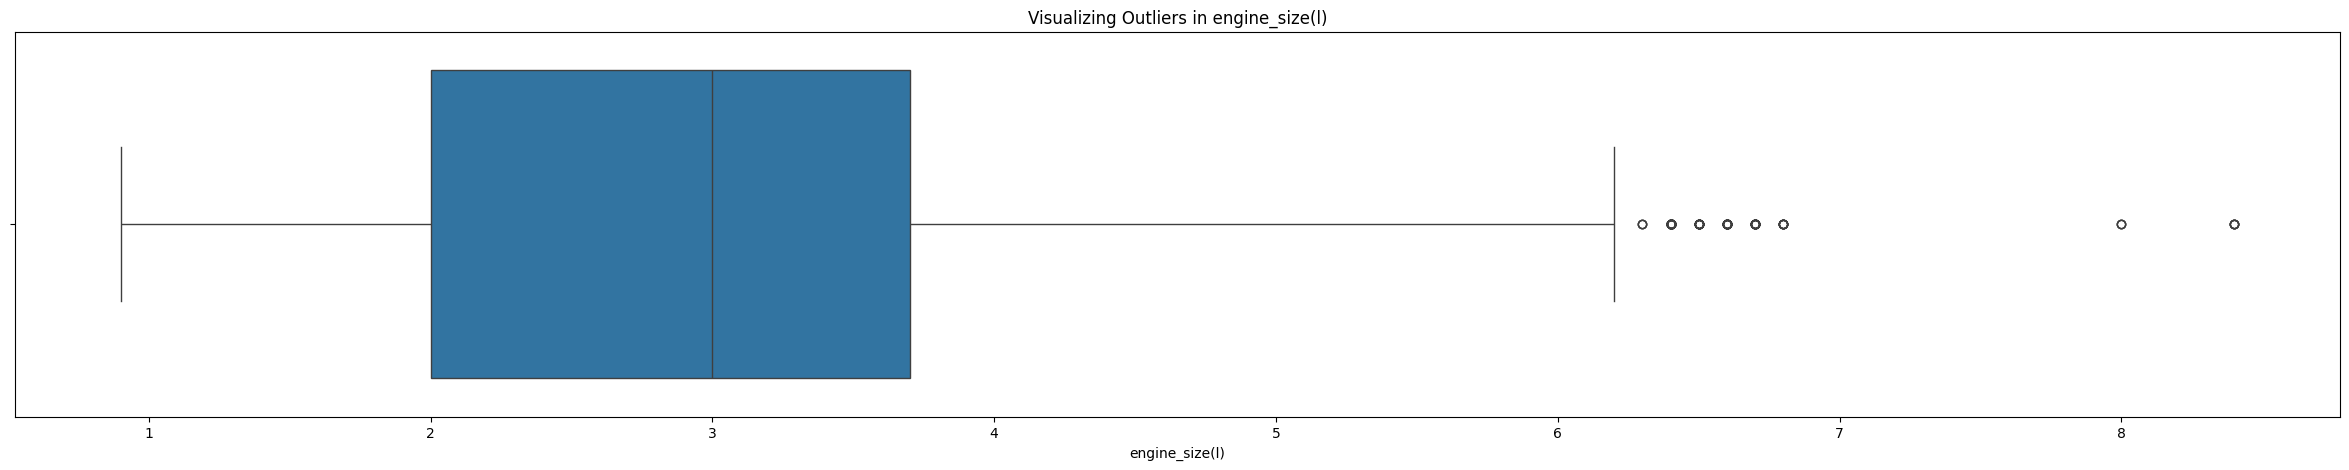

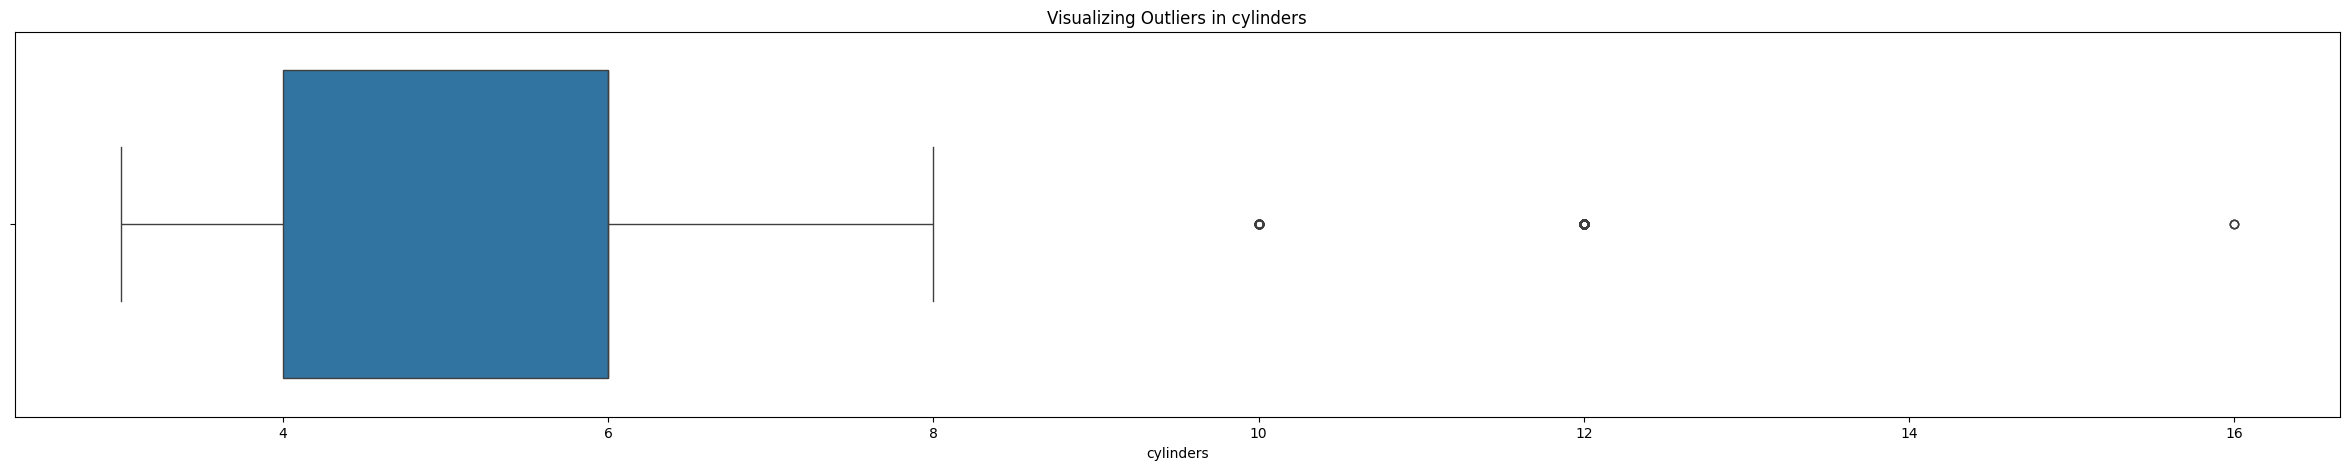

In [72]:
#Visualizing outliers using boxplots
for col in numerical_features:
    plt.figure(figsize=(30,5))
    sns.boxplot(x=emissions_data[col])
    plt.title(f'Visualizing Outliers in {col}')
    plt.show()

In [73]:
print(emissions_data[categorical_feature].value_counts())
print(emissions_data[categorical_feature].isnull().sum())

fuel_type
X    3637
Z    3202
E     370
D     175
N       1
Name: count, dtype: int64
0


In [11]:
#Transforming the data

transformed_numerical_features = np.log(emissions_data[numerical_features])
transformed_target_variable = np.log(emissions_data[target_variable])


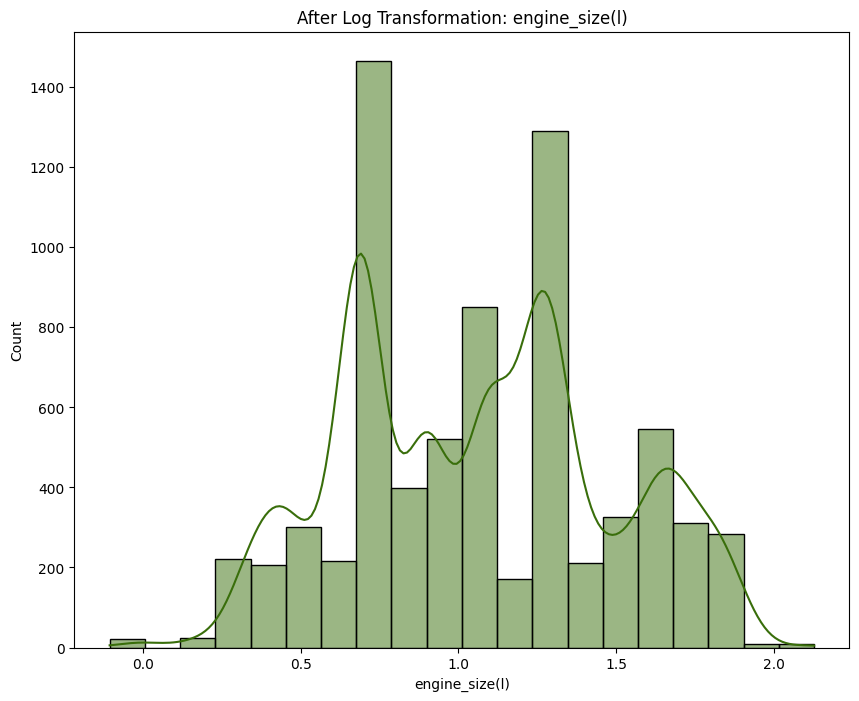

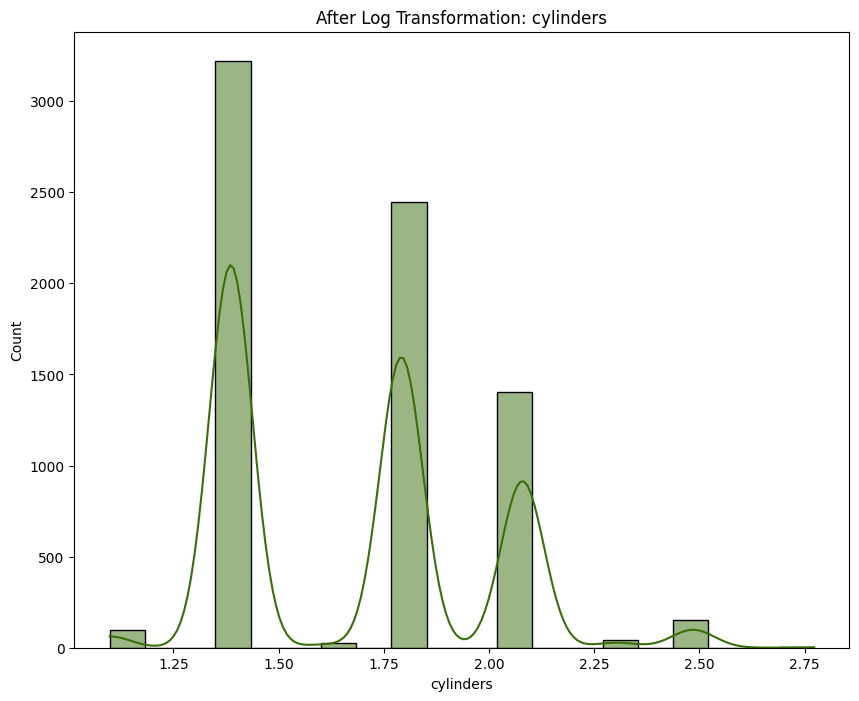

In [75]:
#Transforming the numerical data

for feature in transformed_numerical_features:
    plt.figure(figsize=(10,8))
    sns.histplot(transformed_numerical_features[feature], kde=True, bins=20, color="#396e0b", edgecolor="black")
    plt.title(f"After Log Transformation: {feature}")
    plt.show()

# Plot histograms of each column after the log transformation
#I applied a log transformation because the data is highly skewed and since I'll be modeling a linear regression model, i need to transform the data
#to make it assume a normal distribution and have a constant variance before the linear regression will work


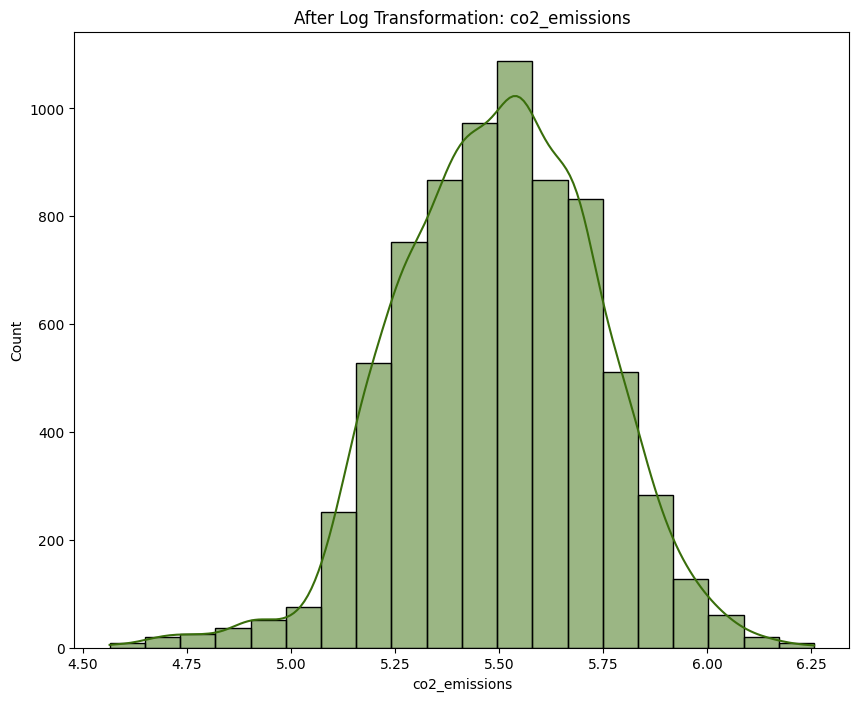

In [13]:
plt.figure(figsize=(10,8))
sns.histplot(transformed_target_variable, kde=True, bins=20, color="#396e0b", edgecolor="black")
plt.title(f"After Log Transformation: {target_variable}")
plt.show()

### Model Training and Evaluation

In [ ]:
# Import ML tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Import models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import joblib, os

/home/yaa_baby/.local/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


The code below trains 4 different models and has an additional 2 models for prediction

Linear Regression → MAE: 0.09, RMSE: 0.13, R²: 0.72
KNN → MAE: 0.09, RMSE: 0.12, R²: 0.76
Random Forest → MAE: 0.08, RMSE: 0.11, R²: 0.77
SVM (RBF) → MAE: 0.09, RMSE: 0.12, R²: 0.73
Gradient Boosting → MAE: 0.08, RMSE: 0.12, R²: 0.76
XGBoost → MAE: 0.08, RMSE: 0.11, R²: 0.77

 Model Performance Summary:
               Model       MAE      RMSE        R2
0  Linear Regression  0.091254  0.126975  0.715957
3          SVM (RBF)  0.088464  0.123196  0.732617
1                KNN  0.085296  0.117919  0.755030
4  Gradient Boosting  0.083100  0.116259  0.761879
2      Random Forest  0.081546  0.114215  0.770178
5            XGBoost  0.081538  0.114187  0.770292


/tmp/ipykernel_3388/2044231419.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=results_df, palette='magma')


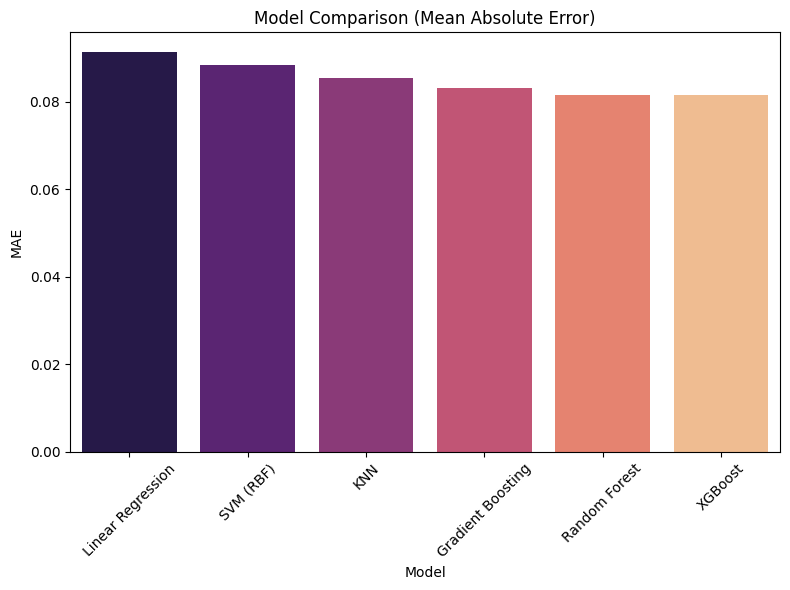

/tmp/ipykernel_3388/2044231419.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=results_df, palette='magma')


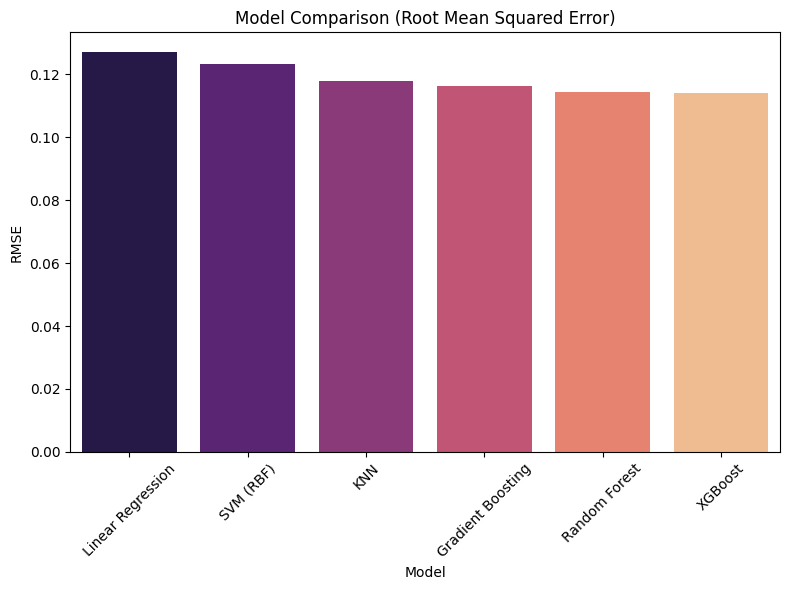

/tmp/ipykernel_3388/2044231419.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2', data=results_df, palette='viridis')


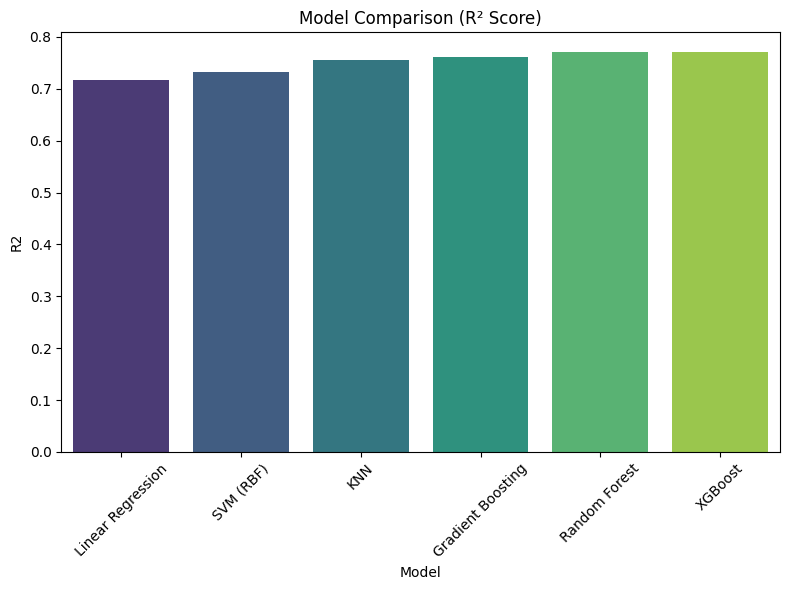

In [ ]:
# Combine transformed numerical features + categorical into one DataFrame that is X
X = pd.concat([transformed_numerical_features, emissions_data[[categorical_feature]]], axis=1)
y = transformed_target_variable.copy()


# One-Hot Encode the categorical feature

encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
encoded_categorical_feature = encoder.fit_transform(X[[categorical_feature]])

# Convert encoded columns into a DataFrame
encoded_cat_df = pd.DataFrame(
    encoded_categorical_feature,
    columns=encoder.get_feature_names_out([categorical_feature]),
    index=X.index
)

# Merge numerical and encoded categorical columns
X_encoded = pd.concat([X.drop(columns=[categorical_feature]), encoded_cat_df], axis=1)


#Spliting the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


# Scale Numerical Features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Define Models

models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVM (RBF)': SVR(kernel='rbf'),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

results = {}


for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predicted_y = model.predict(X_test_scaled)
# Create folder to save models
os.makedirs("model", exist_ok=True)

# Select best model based on highest R²
best_model_name = results.loc[results['R2'].idxmax(), 'Model']
print("Best model:", best_model_name)

# Retrieve best model object from the dictionary
best_model = models[best_model_name]

# Save model + encoder + scaler
joblib.dump(best_model, "model/xgboost_model.pkl")
joblib.dump(encoder, "model/encoder.pkl")
joblib.dump(scaler, "model/scaler.pkl")

print("✅ Model, encoder, and scaler saved successfully!")


